# Session 2 DataFrames and Pandas

This notebook provides a brief introduction to Pandas. Pandas is a package for data analysis and manipulation. It organises data in tabular form in a structure called a DataFrame. Before looking at this, let's define some data in the form of two lists (containing respectively the average height of some tall people aged between 11 and 18).

In [2]:
height_list = [150, 155, 164, 174, 183, 189, 192, 192]
age_list = [11, 12, 13, 14, 15, 16, 17, 18]

The code cells below show some things you can do with this data when it is available in list format:
1. get the height at the age of 13
2. get the mean height between the ages of 11 and 18
3. plot the height vs the age
4. convert to inches

In [3]:
# 1. get the height at the age of 13
i = age_list.index(13)
height_list[i]

164

In [4]:
# 2. get the mean height between the ages of 11 and 18
import numpy as np
np.mean(height_list)

174.875

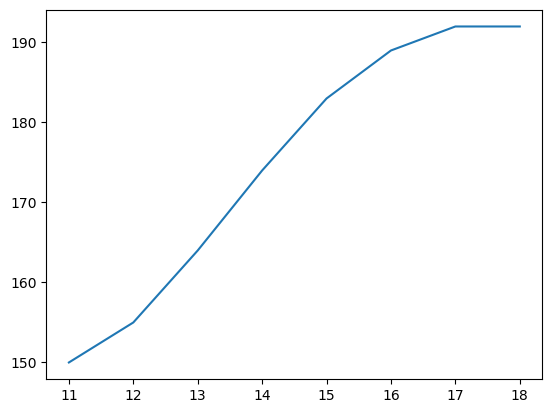

In [5]:
# 3. plot the height vs the age
import matplotlib.pyplot as plt
plt.plot(age_list, height_list)

In [6]:
# 4. convert to inches
height_list_inch = []
for h in height_list:
    h_inch = h * 0.3937
    height_list_inch.append(h_inch)
height_list_inch

[59.055, 61.0235, 64.5668, 68.5038, 72.0471, 74.4093, 75.5904, 75.5904]

## Pandas Series

The code above used various packages and Python instructions to accomplish these tasks. If you store the data as a Pandas `Series` then you can do the same things, but with fewer lines of code.

In [7]:
import pandas as pd

# Same as above
height_list = [150, 155, 164, 174, 183, 189, 192, 192]
age_list = [11, 12, 13, 14, 15, 16, 17, 18]

s = pd.Series(
    index=age_list,
    data=height_list, 
)
s

11    150
12    155
13    164
14    174
15    183
16    189
17    192
18    192
dtype: int64

In [8]:
# 1. get the height at the age of 13
s.loc[13]

164

In [9]:
# 2. get the mean height between the ages of 11 and 18
s.mean()

174.875

<Axes: >

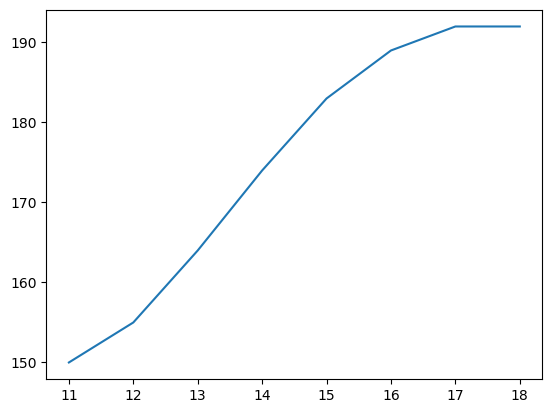

In [10]:
# 3. plot the height vs the age
s.plot()

In [11]:
# 4. convert to inches
s_inch = s * 0.3937
s_inch

11    59.0550
12    61.0235
13    64.5668
14    68.5038
15    72.0471
16    74.4093
17    75.5904
18    75.5904
dtype: float64

***Exercise 1***: We have a table with the price of solar panels expressed as Euro per watt over time. Create a pandas Series and plot the data as a bar chart (see <A href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html</A>).

| year | cost |
|------|------|
| 2010 | 7.34 |
| 2011 | 6.44 |
| 2012 | 4.55 |
| 2013 | 3.97 |
| 2014 | 3.49 |
| 2015 | 3.23 |
| 2016 | 3.02 |
| 2017 | 2.84 |
| 2018 | 2.70 |
| 2019 | 2.53 |
| 2020 | 2.34 |

<Axes: >

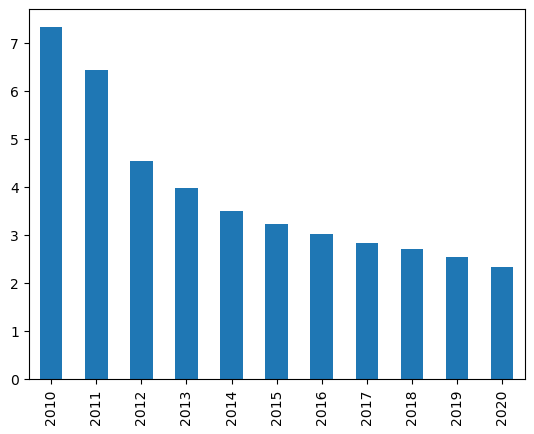

In [16]:
year_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
cost_list = [7.34, 6.44, 4.55, 3.97, 3.49, 3.23, 3.02, 2.84, 2.70, 2.53, 2.34]

# Add your code here
s = pd.Series(
    index=year_list,
    data=cost_list, 
)
s.plot.bar()

## Pandas DataFrame

A Pandas Series is basically just one column of data, with its corresponding index. A DataFrame consists of multiple Series and all columns share a common index. In the code cell below, a DataFrame is created with the age data serving as the index. There are two data columns, one with the height and the other with the weight.

In [17]:
weight_list = [42, 46, 50, 53, 55, 58, 62, 65]

df = pd.DataFrame(
    index=age_list,
    data={
       'height': height_list,
       'weight': weight_list,
    },
)
df

,height,weight
11,150,42
12,155,46
13,164,50
14,174,53
15,183,55
16,189,58
17,192,62
18,192,65


As demonstrated earlier, the plot function provides a quick way to inspect the data.

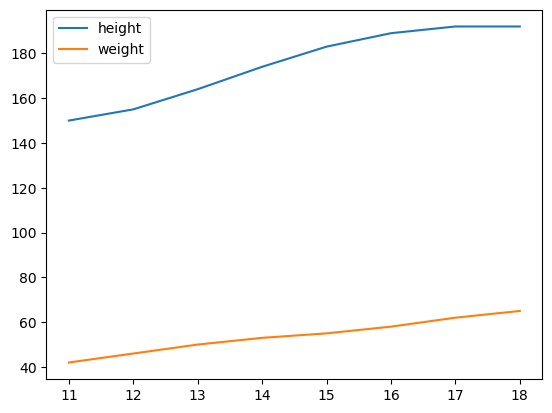

In [15]:
df.plot();

Since the numerical values of height and weight differ quite a lot, adding a secondary axis gives a better overview.

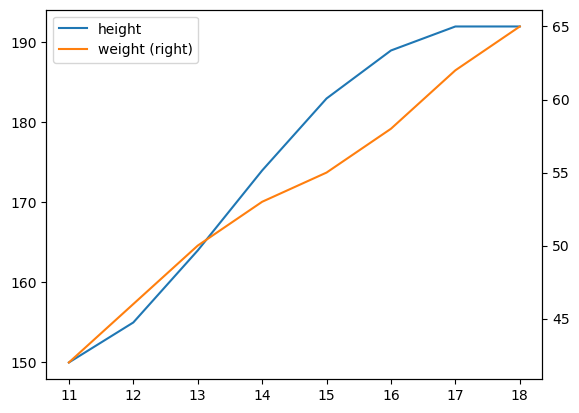

In [18]:
df.plot(secondary_y=["weight"]);

Adding a column is easy. For example, adding the body mass index (BMI) calculated from the weight and height columns is done in the following way

In [19]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df

,height,weight,BMI
11,150,42,18.666667
12,155,46,19.146722
13,164,50,18.590125
14,174,53,17.505615
15,183,55,16.423303
16,189,58,16.236947
17,192,62,16.818576
18,192,65,17.632378


As the above code cell shows, individual columns can be accessed by typing the column name between square brackets that directly follow the DataFrame name. Another way to get a specific column is to use a dot followed by its name

In [20]:
df.BMI

11    18.666667
12    19.146722
13    18.590125
14    17.505615
15    16.423303
16    16.236947
17    16.818576
18    17.632378
Name: BMI, dtype: float64

A specific row can be selected using .loc[*x*], where the value of the index for that row should replace the *x* between the square brackets. For example for second last row the index value is 17 so the statement becomes

In [21]:
df.loc[17]

height    192.000000
weight     62.000000
BMI        16.818576
Name: 17, dtype: float64

To get a specific value from a row column pair, both the index value and the column name can be provided

In [22]:
df.loc[17, "BMI"]

16.81857638888889

***Exercise 2***: Modify the code cell above so that you obtain both the height and the BMI for a row using a single line of code.

In [23]:
# Type your code here

df.loc[17, ["height", "BMI"]]

height    192.000000
BMI        16.818576
Name: 17, dtype: float64

Slicing or indexing the DataFrame based on a conditional is also possible. For example, to get only the rows for which the height is larger than 180 cm:

In [25]:
idx = df['height'] > 180
dfsub = df.loc[idx]
dfsub

,height,weight,BMI
15,183,55,16.423303
16,189,58,16.236947
17,192,62,16.818576
18,192,65,17.632378


Summary statistics are quickly obtained using the `describe` function.

In [26]:
df.describe()

,height,weight,BMI
count,8.000000,8.000000,8.000000
mean,174.875000,53.875000,17.627542
std,16.839049,7.809106,1.093325
min,150.000000,42.000000,16.236947
25%,161.750000,49.000000,16.719758
50%,178.500000,54.000000,17.568997
75%,189.750000,59.000000,18.609260
max,192.000000,65.000000,19.146722


Saving the DataFrame to an Excel file is easy using the `to_excel` function.

In [27]:
df.to_excel("hwb.xlsx")

Importing the data from Excel is also easy (using the `read_excel` function). We'll explore these in later sessions in more detail.

## Data types

The data used above could just as well have been handled by an array because it only involved numbers. In a DataFrame, it is possible to have mulitple data types. In the example below, one of the lengths is a string. This is a very simplistic example, but it may occur importing data from a file (for which Pandas offers many options).

In [28]:
new_s = pd.Series(
    data=[150, 155, 164, 174, 183, 189, 192, '192'], 
    index=[11, 12, 13, 14, 15, 16, 17, 18],
)
new_s

11    150
12    155
13    164
14    174
15    183
16    189
17    192
18    192
dtype: object

Converting the lenghts to inches will result in a `TypeError` because a string can't be multiplied by a floating point number.

In [29]:
new_s * 0.3937

TypeError: can't multiply sequence by non-int of type 'float'

A way to avoid this is to try and convert all data to a number using the `to_numeric` function.

In [30]:
new_s = pd.to_numeric(new_s)
new_s * 0.3937

11    59.0550
12    61.0235
13    64.5668
14    68.5038
15    72.0471
16    74.4093
17    75.5904
18    75.5904
dtype: float64

***Exercise 3*** Execute the code cell below and inspect the output. Explain what happens.

In [32]:
new_s = new_s.astype(str)
new_s * 2

11    150150
12    155155
13    164164
14    174174
15    183183
16    189189
17    192192
18    192192
dtype: object